In [1]:
import pandas as pd

df = pd.read_csv('amz_uk_price_prediction_dataset.csv')

df.head()

C:\Users\erik\AppData\Local\Temp\ipykernel_5472\2656835927.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [2]:
df.shape

(2443651, 9)

In [3]:
# Generate a frequency table for the product category
category_freq = df['category'].value_counts()

# Calculate the mean, median, and mode for the price of products
price_mean = df['price'].mean()
price_median = df['price'].median()
price_mode = df['price'].mode()[0]  # mode() returns a Series, get the first value

# Display the results
category_freq, price_mean, price_median, price_mode

(category
 Sports & Outdoors                         836265
 Beauty                                     19312
 Handmade Clothing, Shoes & Accessories     19229
 Bath & Body                                19092
 Birthday Gifts                             18978
                                            ...  
 Alexa Built-In Devices                       107
 Motorbike Chassis                            107
 Plugs                                        107
 Smart Home Security & Lighting               104
 Smart Speakers                                54
 Name: count, Length: 296, dtype: int64,
 89.24380943923663,
 19.09,
 9.99)

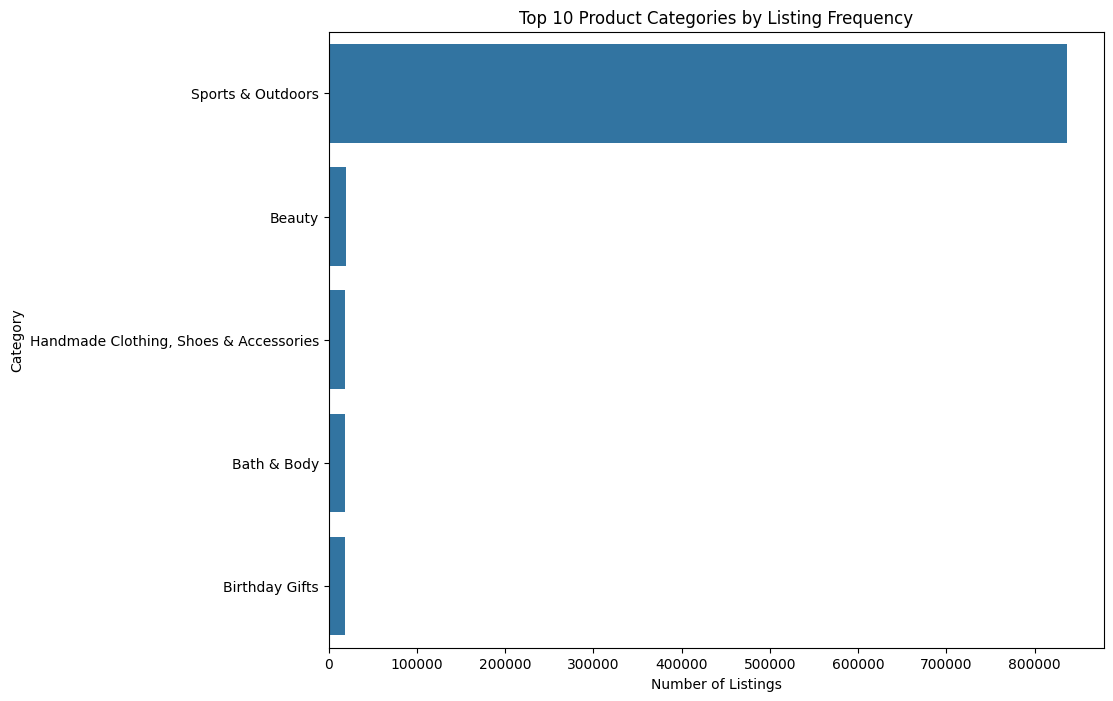

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

top_categories = df['category'].value_counts().head(5)

plt.figure(figsize=(10, 8))
sns.barplot(x=top_categories.values, y=top_categories.index)
plt.title('Top 10 Product Categories by Listing Frequency')
plt.xlabel('Number of Listings')
plt.ylabel('Category')
plt.show()



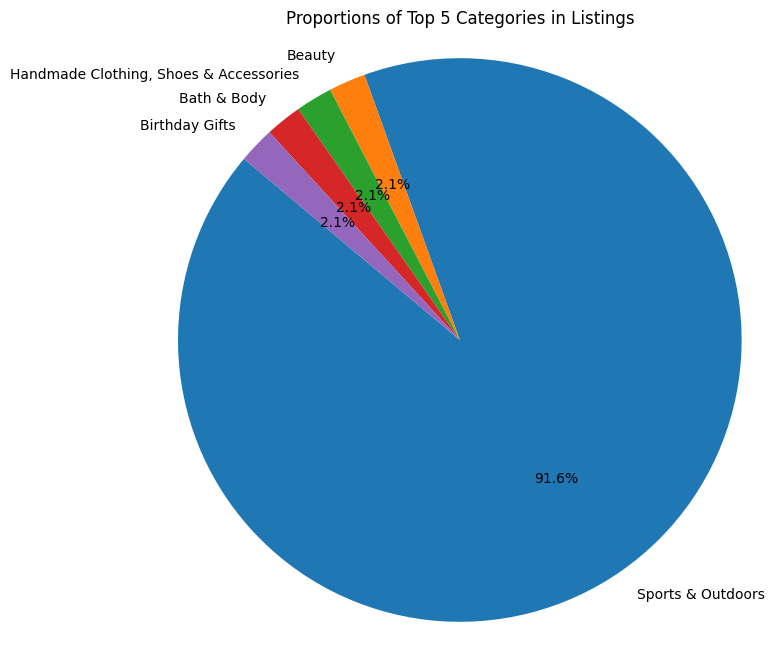

In [18]:
# Plotting the distribution of the top categories using a pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_categories, labels=top_categories.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportions of Top 5 Categories in Listings')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.show()


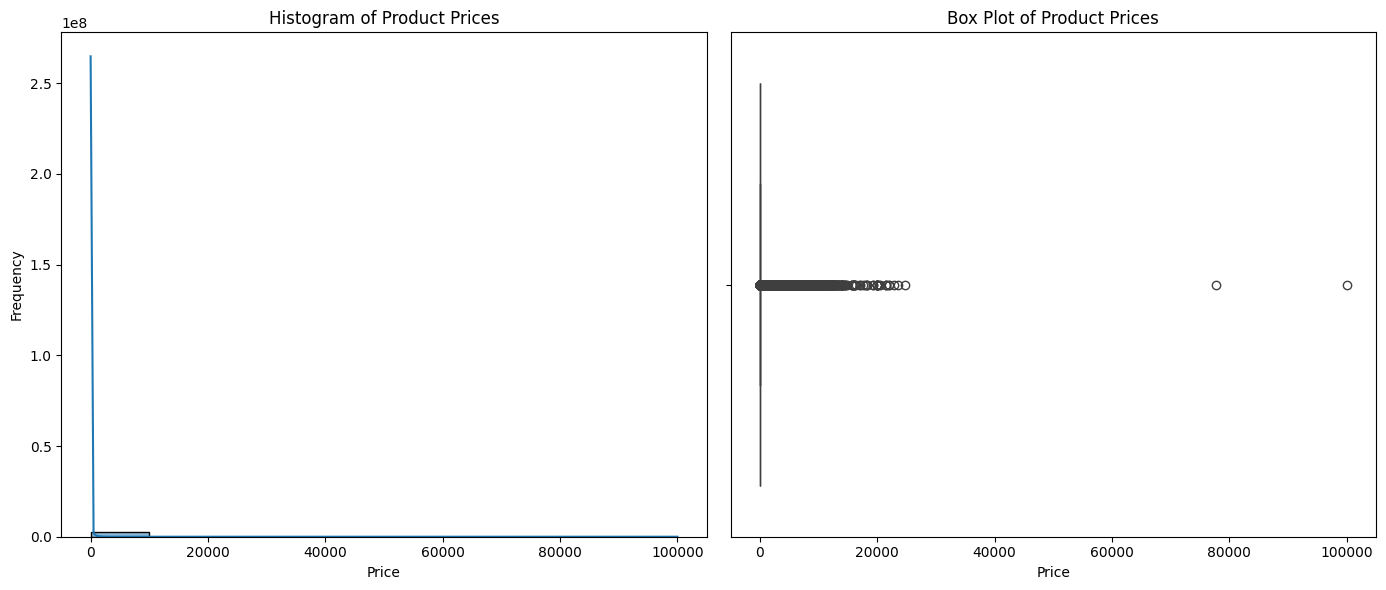

In [5]:
# Calculate the mean, median, and mode for the price of products
price_mean = df['price'].mean()
price_median = df['price'].median()
price_mode = df['price'].mode()[0]

# Measures of Dispersion for product price
price_variance = df['price'].var()
price_std = df['price'].std()
price_range = df['price'].max() - df['price'].min()
price_quartiles = df['price'].quantile([0.25, 0.75])
interquartile_range = price_quartiles[0.75] - price_quartiles[0.25]

# Visualize the distribution of product prices with a histogram and box plot
plt.figure(figsize=(14, 6))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(df['price'], bins=10, kde=True)
plt.title('Histogram of Product Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')

# Box plot
plt.subplot(1, 2, 2)
sns.boxplot(x=df['price'])
plt.title('Box Plot of Product Prices')
plt.xlabel('Price')

plt.tight_layout()
plt.show()


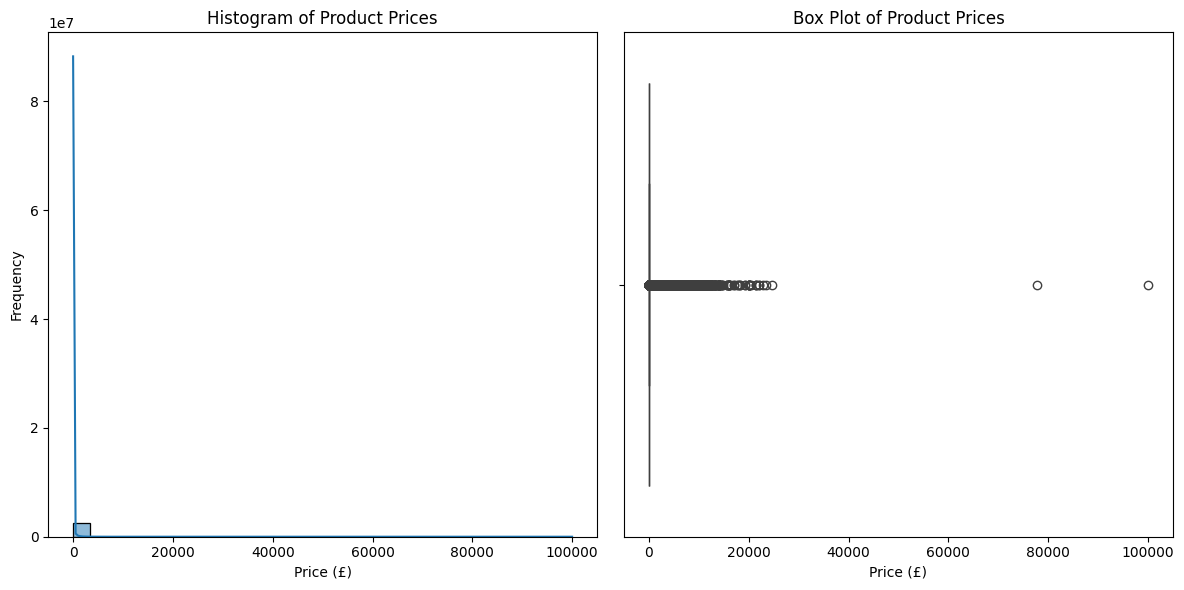

(89.24380943923663,
 19.09,
 9.99,
 119445.48532254907,
 345.60886175349884,
 100000.0,
 36.0)

In [19]:
# Part 2: Delving into Product Pricing

# 1. Measures of Centrality
mean_price = df['price'].mean()
median_price = df['price'].median()
mode_price = df['price'].mode()[0]

# 2. Measures of Dispersion
variance_price = df['price'].var()
std_dev_price = df['price'].std()
range_price = df['price'].max() - df['price'].min()
quartiles_price = df['price'].quantile([0.25, 0.75])
interquartile_range_price = quartiles_price[0.75] - quartiles_price[0.25]

# Preparing for visualizations
# Histogram
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Histogram of Product Prices')
plt.xlabel('Price (£)')
plt.ylabel('Frequency')

# Box Plot
plt.subplot(1, 2, 2)
sns.boxplot(x=df['price'])
plt.title('Box Plot of Product Prices')
plt.xlabel('Price (£)')

plt.tight_layout()
plt.show()

(mean_price, median_price, mode_price, variance_price, std_dev_price, range_price, interquartile_range_price)


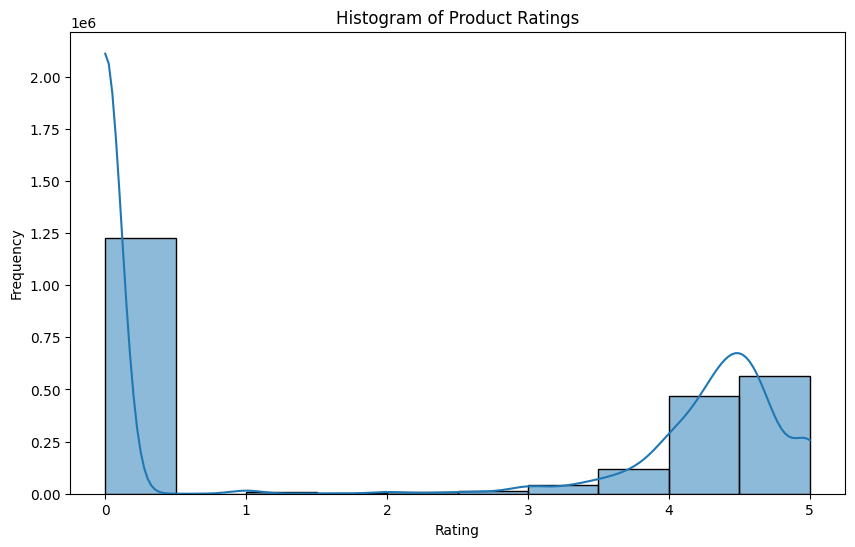

In [6]:
# Measures of Centrality for product ratings
rating_mean = df['stars'].mean()
rating_median = df['stars'].median()
rating_mode = df['stars'].mode()[0]

# Measures of Dispersion for product ratings
rating_variance = df['stars'].var()
rating_std = df['stars'].std()
rating_quartiles = df['stars'].quantile([0.25, 0.75])
rating_iqr = rating_quartiles[0.75] - rating_quartiles[0.25]

# Visualize the distribution of product ratings with a histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['stars'], bins=10, kde=True)
plt.title('Histogram of Product Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


In [21]:
df['price'].max()

100000.0

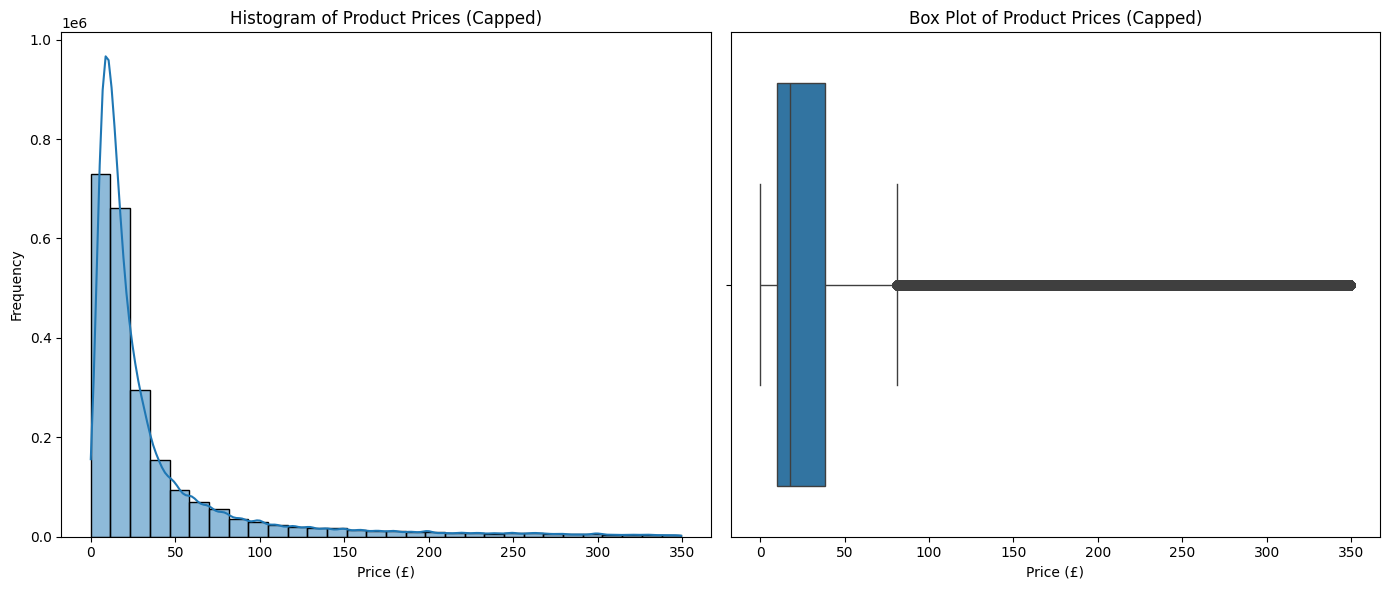

In [22]:
# Define a price cap, for example, the 95th percentile of the data
price_cap = df['price'].quantile(0.95)

# Exclude outliers beyond the price cap
filtered_prices = df[df['price'] <= price_cap]['price']

# Plot the adjusted histogram and box plot
plt.figure(figsize=(14, 6))

# Adjusted Histogram
plt.subplot(1, 2, 1)
sns.histplot(filtered_prices, bins=30, kde=True)
plt.title('Histogram of Product Prices (Capped)')
plt.xlabel('Price (£)')
plt.ylabel('Frequency')

# Adjusted Box Plot
plt.subplot(1, 2, 2)
sns.boxplot(x=filtered_prices)
plt.title('Box Plot of Product Prices (Capped)')
plt.xlabel('Price (£)')

plt.tight_layout()
plt.show()
